# Anomaly Detection & Time Series Assignment 

Q 1.   What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

->  Anomaly Detection is the process of identifying data points or patterns that significantly differ from normal behavior. These unusual observations are called anomalies or outliers. Anomaly detection is widely used in fraud detection, network security, healthcare monitoring, and industrial systems. The main goal is to detect unexpected behavior that may indicate errors, risks, or important events.

There are three main types of anomalies. Point anomalies occur when a single data point is very different from the rest, such as an unusually high credit card transaction amount. Contextual anomalies depend on the context or time; for example, high electricity usage at night may be normal in winter but abnormal in summer. Collective anomalies occur when a group of data points together forms an abnormal pattern, such as a sudden drop in server performance over several hours. Each type helps identify different kinds of problems in real-world systems.

Q 2.  Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of 
their approach and suitable use cases.

->  Isolation Forest detects anomalies by randomly splitting data and isolating points. Anomalies are isolated faster because they require fewer splits. It is efficient, scalable, and works well with large datasets. Isolation Forest is suitable for fraud detection and real-time monitoring systems.

DBSCAN is a density-based algorithm that identifies anomalies as points that do not belong to any dense cluster. It is useful when data has irregular shapes and noise. DBSCAN works well for spatial data but struggles in high-dimensional datasets.

Local Outlier Factor (LOF) detects anomalies by comparing the local density of a point with its neighbors. If a point has significantly lower density, it is considered an outlier. LOF is effective when anomalies are relative to local regions rather than the global dataset.

Q 3.  What are the key components of a Time Series? Explain each with one 
example.

->  A time series consists of data points collected at regular time intervals. The trend represents the long-term direction of the data, such as increasing airline passengers over years. Seasonality refers to repeating patterns at fixed intervals, like higher sales during festive seasons every year.

Cyclical components show fluctuations over long periods caused by economic conditions, such as business cycles. Residual or noise represents random variations that cannot be explained by trend or seasonality. Together, these components help understand and model time-based data effectively.

Q 4.  Define Stationary in time series. How can you test and transform a 
non-stationary series into a stationary one? 

->  A time series is called stationary when its statistical properties such as mean, variance, and autocorrelation remain constant over time. Stationarity is important because many time series models assume stable patterns.

To test stationarity, we commonly use the Augmented Dickey-Fuller (ADF) test. If the p-value is less than 0.05, the series is considered stationary.
Non-stationary data can be transformed into stationary form by applying differencing, logarithmic transformation, or seasonal differencing. These transformations remove trends and stabilize variance, making the data suitable for modeling.

Q 5.  Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in 
terms of structure and application.

->  AR (AutoRegressive) models use past values to predict future values.

MA (Moving Average) models use past error terms for prediction.

ARIMA combines AR and MA with differencing to handle non-stationary data.

SARIMA extends ARIMA by including seasonal components, making it suitable for seasonal time series like monthly sales.

SARIMAX further extends SARIMA by including external variables such as weather or holidays. These models are used depending on data complexity and seasonality.

In [1]:
# Dataset: 
# ● NYC Taxi Fare Data 
# ● AirPassengers Dataset 

Q 6.  Load a time series dataset (e.g., AirPassengers), plot the original series, 
and decompose it into trend, seasonality, and residual components

-> Python Code

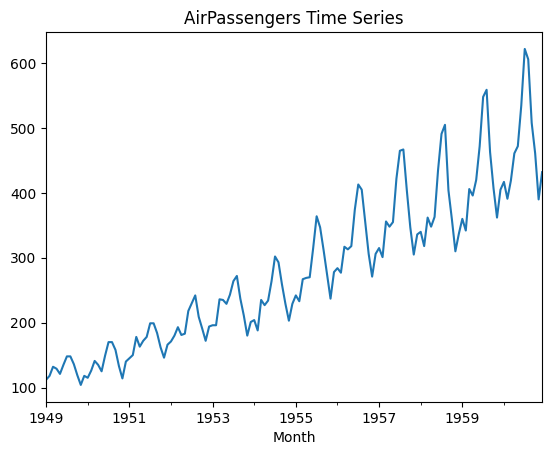

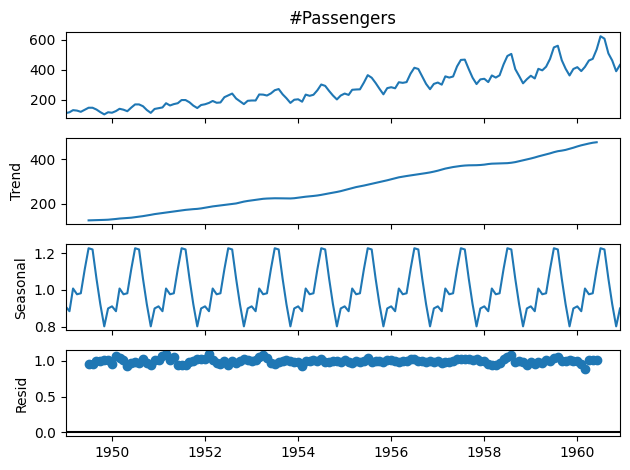

In [6]:
# Python Code
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot original time series
data['#Passengers'].plot(title="AirPassengers Time Series")
plt.show()

# Decompose into trend, seasonality, residual
result = seasonal_decompose(data['#Passengers'], model='multiplicative')
result.plot()
plt.show()

Q 7.  Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to 
detect anomalies. Visualize the anomalies on a 2D scatter plot.

->  Python Code

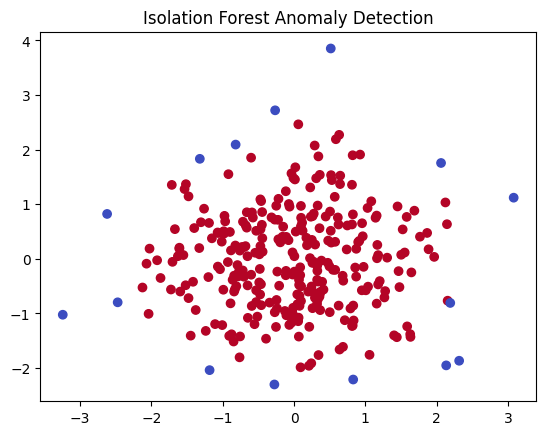

In [8]:
# Python Code
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# Sample numeric data
np.random.seed(42)
X = np.random.randn(300, 2)

# Isolation Forest
iso = IsolationForest(contamination=0.05)
labels = iso.fit_predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=labels, cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.show()

Q 8.  Train a SARIMA model on the monthly airline passengers dataset. 
Forecast the next 12 months and visualize the results.

->  Python Code

C:\Users\skada\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skada\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


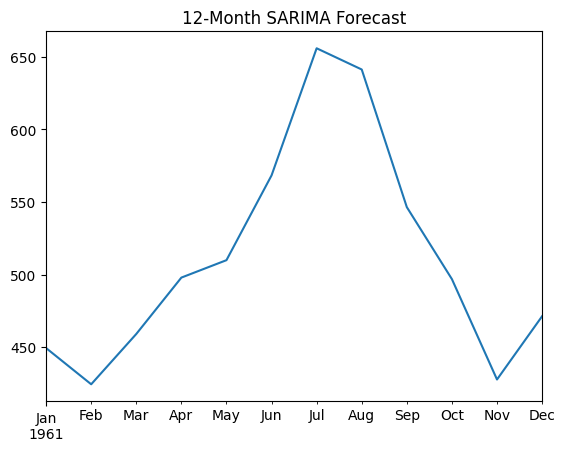

In [7]:
# Python Code
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Build SARIMA model
model = SARIMAX(
    data['#Passengers'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.forecast(steps=12)

# Plot forecast
forecast.plot(title="12-Month SARIMA Forecast")
plt.show()

Q 9.  Apply Local Outlier Factor (LOF) on any numerical dataset to detect 
anomalies and visualize them using matplotlib.

->  Python Code

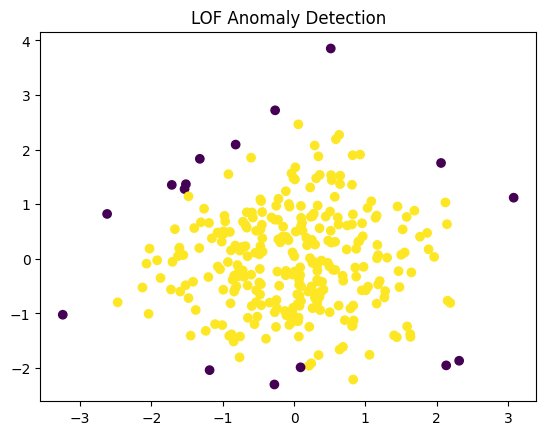

In [10]:
# Python Code
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
labels = lof.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.title("LOF Anomaly Detection")
plt.show()

Q 10.  You are working as a data scientist for a power grid monitoring company. 
Your goal is to forecast energy demand and also detect abnormal spikes or drops in 
real-time consumption data collected every 15 minutes. The dataset includes features 
like timestamp, region, weather conditions, and energy usage.
    
Explain your real-time data science workflow: 

● How would you detect anomalies in this streaming data (Isolation Forest / LOF / 
DBSCAN)? 

● Which time series model would you use for short-term forecasting (ARIMA / 
SARIMA / SARIMAX)? 

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?

->  For real-time power grid monitoring, anomaly detection and forecasting must work together. To detect abnormal spikes or drops, I would use Isolation Forest or LOF because they are efficient and adaptive for streaming data. DBSCAN may also be used for spatial anomalies across regions.

For short-term forecasting, I would use SARIMAX, as it allows inclusion of external variables like weather and region. This improves forecasting accuracy for energy demand.

Model performance would be validated using rolling-window evaluation, error metrics like MAE and RMSE, and continuous monitoring dashboards.
This solution helps business operations by enabling early fault detection, preventing blackouts, optimizing energy distribution, and reducing operational costs. It allows decision-makers to act quickly based on accurate forecasts and anomaly alerts.

C:\Users\skada\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skada\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


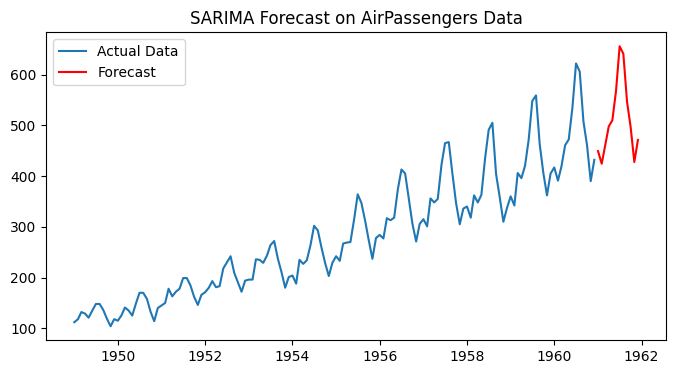

In [8]:
# Python Code
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# SARIMA model
model = SARIMAX(
    data['#Passengers'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

results = model.fit(disp=False)

# Forecast future values
forecast = results.forecast(steps=12)

# Plot original data + forecast
plt.figure(figsize=(8,4))
plt.plot(data['#Passengers'], label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.legend()
plt.title("SARIMA Forecast on AirPassengers Data")
plt.show()